# Etivity 2
## Name: Martin Power
## ID      : 9939245

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import re
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import power_transform
from scipy.stats import boxcox

%matplotlib inline

In [2]:
df = pd.read_csv('./bank_et2.csv')

print("Numer of Samples  in Dataset:\t",df.shape[0])
print("Numer of Features in Dataset:\t",df.shape[1])

# Drop column 0
df = df.drop(df.columns[0], axis=1)

Numer of Samples  in Dataset:	 2000
Numer of Features in Dataset:	 20


In [3]:
# Examine the first few data rows
# Print first 5 rows of the dataframe
df.head(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [4]:
# Examine the last few data rows.
# Print last 5 rows of the dataframe
df.tail(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,-0.965874,0.302708,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [5]:
# Calculate statistics for the numerical attributes.

# Print statistical summary for all numerical attributes
df.describe()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


In [6]:
# From https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical
# The following code extracts the columns with categorical attributes

cat_var = [key for key in dict(df.dtypes)
             if dict(df.dtypes)[key] in ['object'] ] # Categorical Varible

for var in cat_var:
    print("\n****\t",var,"\t****")
    print("Total Values = \t",df[var].count(),"\n")
    print(df[var].value_counts())
    print("****************************")


****	 job 	****
Total Values = 	 1990 

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64
****************************

****	 marital 	****
Total Values = 	 2000 

married     1111
single       674
divorced     215
Name: marital, dtype: int64
****************************

****	 education 	****
Total Values = 	 1896 

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64
****************************

****	 default 	****
Total Values = 	 2000 

no     1985
yes      15
Name: default, dtype: int64
****************************

****	 housing 	****
Total Values = 	 2000 

no     1037
yes     963
Name: housing, dtype: int64
****************************

****	 loan 	****
Total Values = 	 2000 

no     1750
yes     250
Name: loan, dtype: int64
**********************

In [7]:
df.apply(lambda x: sum(x.isnull()), axis=0)

age              12
job              10
marital           0
education       104
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         191
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome        454
subscribed        0
dtype: int64

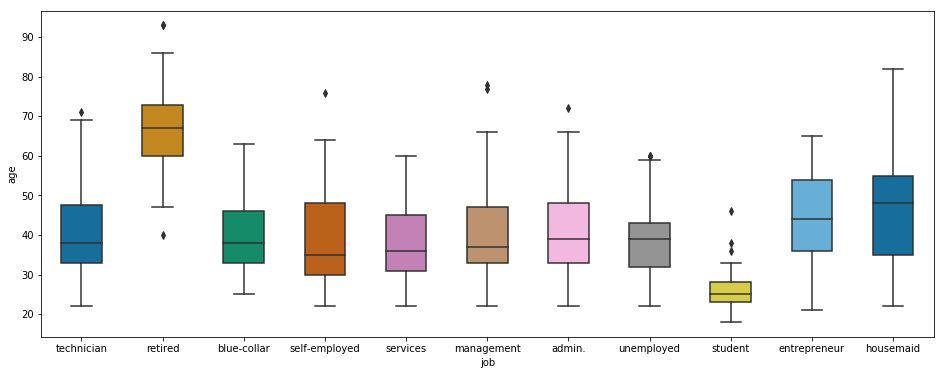

In [8]:
plt.figure(figsize=(16, 6))
bplot = sns.boxplot(y='age', x='job', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

In [9]:
# Get list of numeric columns.
# This will be used later in outlier detection
# If this is not stored now it will later include categorical values that have been converted to numerical for the
# decision tree for age imputation

# From https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

### Fill In Missing "Age" Values

In [10]:
# https://dzone.com/articles/pandas-find-rows-where-columnfield-is-null
null_columns=df.columns[df.isnull().any()]
print(df[df["age"].isnull()])

      age            job  marital  education default  balance  ratio_bal_ln  \
456   NaN  self-employed  married   tertiary      no      917      0.311161   
472   NaN    blue-collar  married    primary      no      474      0.729179   
526   NaN       services  married  secondary      no     2478      0.469463   
595   NaN     management  married   tertiary      no     1857     -0.137751   
597   NaN  self-employed  married  secondary     yes      254      0.800582   
601   NaN         admin.   single  secondary      no      111      0.269082   
605   NaN     management  married   tertiary      no     1330      1.007376   
744   NaN     management  married   tertiary      no      -61      0.638129   
795   NaN     technician   single   tertiary      no      992      0.901646   
1171  NaN        retired  married   tertiary      no     2812     -0.336489   
1232  NaN        student   single  secondary      no      431     -1.980588   
1408  NaN  self-employed   single   tertiary      no

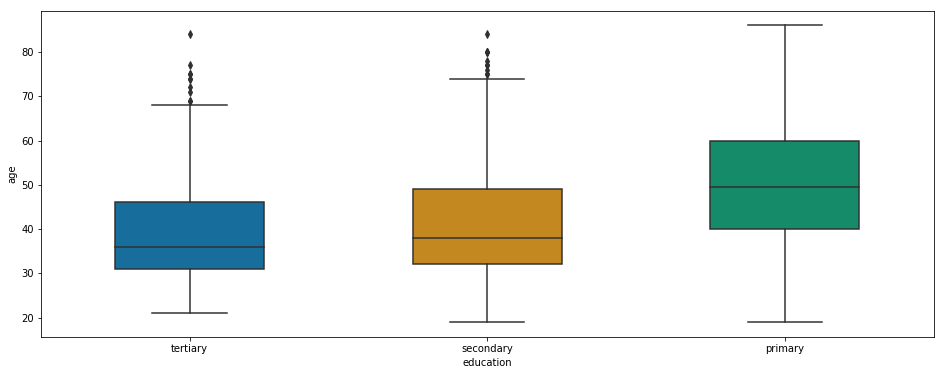

In [11]:
plt.figure(figsize=(16, 6))
bplot = sns.boxplot(y='age', x='education', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

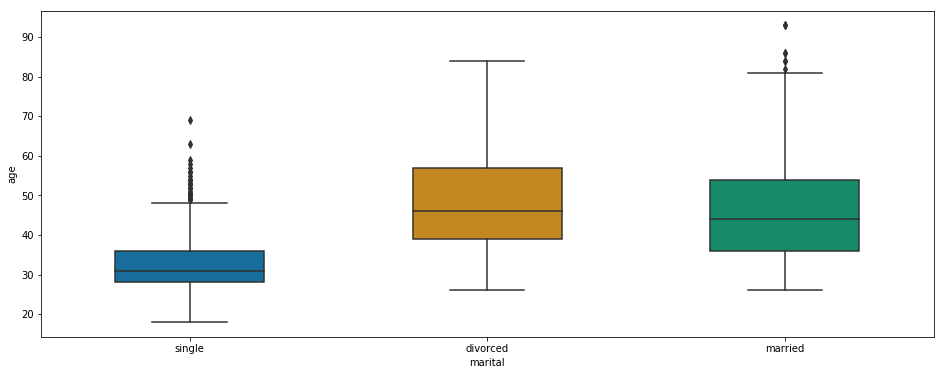

In [12]:
plt.figure(figsize=(16, 6))
bplot = sns.boxplot(y='age', x='marital', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

In [13]:
df['work_status'] = df['job']

In [14]:
# Set Work Status values to either 'available', 'student' or 'retired'
di = {'management'    : 'available',       
      'technician'   : 'available',      
      'blue-collar'   : 'available',      
      'admin.'        : 'available',           
      'services'      : 'available',          
      'unemployed'    : 'available',        
      'self-employed' : 'available',     
      'entrepreneur'  : 'available',      
      'housemaid'     : 'available'}   
df['work_status'].replace(di, inplace=True)
df['work_status'].head(10)

0    available
1    available
2      retired
3    available
4      retired
5    available
6    available
7    available
8    available
9    available
Name: work_status, dtype: object

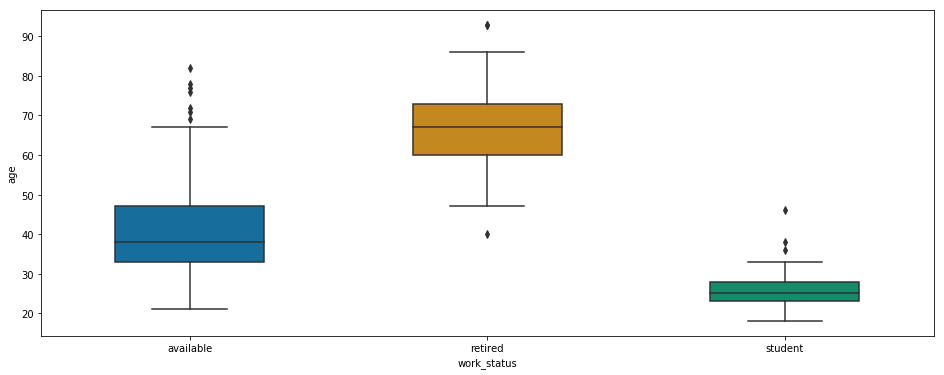

In [15]:
# Compare Work Status for Peopl
plt.figure(figsize=(16, 6))
bplot = sns.boxplot(y='age', x='work_status', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

In [16]:
# Create an attribute that says if someone has even been married
df['has_been_married'] = df['marital']
df['has_been_married'].head(10)
di = {'divorced'    : 'yes',       
      'married'     : 'yes',      
      'single'      : 'no'}   
df['has_been_married'].replace(di, inplace=True)
df['has_been_married'].head(10)

0     no
1    yes
2    yes
3    yes
4    yes
5    yes
6    yes
7    yes
8    yes
9    yes
Name: has_been_married, dtype: object

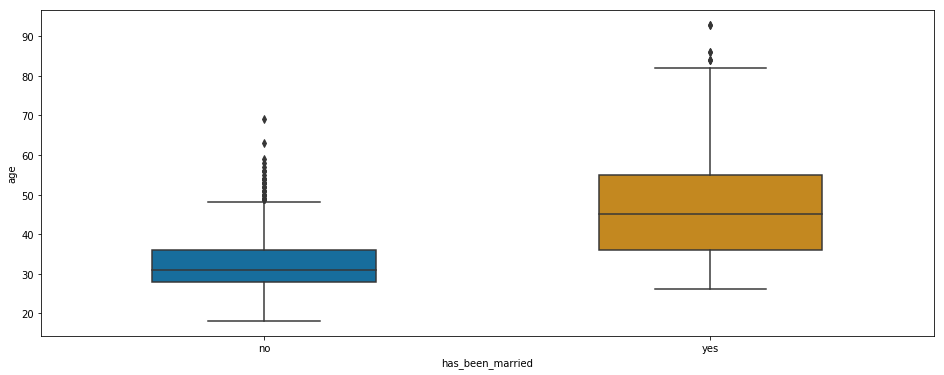

In [17]:
# Compare Work Status for Peopl
plt.figure(figsize=(16, 6))
bplot = sns.boxplot(y='age', x='has_been_married', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

In [18]:
df['post_primary'] = df['education']
df['post_primary'].head(10)
di = {'tertiary'    : 'yes',       
      'secondary'   : 'yes',      
      'primary'     : 'no'}   
df['post_primary'].replace(di, inplace=True)
df['post_primary'].head(10)

0    yes
1    yes
2    yes
3    yes
4    yes
5    yes
6    yes
7    yes
8    yes
9    yes
Name: post_primary, dtype: object

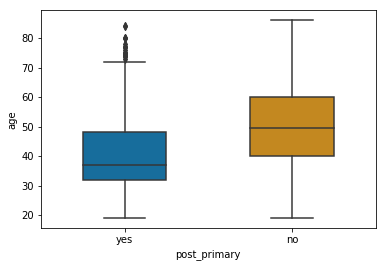

In [19]:
# Compare Work Status for Peopl
bplot = sns.boxplot(y='age', x='post_primary', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

In [20]:
df.head()

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,...,month,duration,campaign,pdays,previous,poutcome,subscribed,work_status,has_been_married,post_primary
0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,...,apr,957,2,131,2,failure,no,available,no,yes
1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,...,apr,233,2,133,1,failure,no,available,yes,yes
2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,...,apr,126,2,239,1,failure,no,retired,yes,yes
3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,...,apr,274,1,238,2,failure,no,available,yes,yes
4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,...,apr,479,1,307,1,failure,no,retired,yes,yes


In [21]:
#print(age2_df.shape)
#age2_df = age2_df.dropna(axis=0, how='any')
#print(age2_df.shape)

df = pd.get_dummies(df, columns=['work_status',  'has_been_married', 'post_primary'], drop_first=True)

df.head()

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,...,duration,campaign,pdays,previous,poutcome,subscribed,work_status_retired,work_status_student,has_been_married_yes,post_primary_yes
0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,...,957,2,131,2,failure,no,0,0,0,1
1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,...,233,2,133,1,failure,no,0,0,1,1
2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,...,126,2,239,1,failure,no,1,0,1,1
3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,...,274,1,238,2,failure,no,0,0,1,1
4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,...,479,1,307,1,failure,no,1,0,1,1


In [22]:
df.describe()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous,work_status_retired,work_status_student,has_been_married_yes,post_primary_yes
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,41.753018,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500,0.081000,0.04800,0.663000,0.839500
std,12.724358,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735,0.272903,0.21382,0.472803,0.367161
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000,0.000000,0.00000,0.000000,1.000000
50%,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000,0.000000,0.00000,1.000000,1.000000
75%,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000,0.000000,0.00000,1.000000,1.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000,1.000000,1.00000,1.000000,1.000000


In [23]:
y = df[['age']].values
X = df[['work_status_retired','work_status_student', 'has_been_married_yes', 'post_primary_yes']].values

In [24]:
# from https://stackoverflow.com/questions/911871/detect-if-a-numpy-array-contains-at-least-one-non-numeric-value
if (np.where(np.isnan(y)))[0].shape[0]: 
    print ("y contains nan")
else:
    print ("y does not contain nan")
    
if (np.where(np.isnan(X)))[0].shape[0]: 
    print ("X contains nan")
else:
    print ("X does not contain nan")
    
# Y Contains Nan that needs to be removed
# Get index of locations that contain NaN
# and remove from both X and Y
nan_idx = np.argwhere(np.isnan(y))
nan_idx = nan_idx[:,0]

y = np.delete(y, nan_idx, 0)
X = np.delete(X, nan_idx, 0)

if (np.where(np.isnan(y)))[0].shape[0]: 
    print ("y contains nan")
else:
    print ("y does not contain nan")

y contains nan
X does not contain nan
y does not contain nan


In [25]:
print(y.shape)
print(X.shape)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(1988, 1)
(1988, 4)


In [26]:
from sklearn import tree

age_dt = tree.DecisionTreeRegressor()
age_dt = age_dt.fit(X_train, y_train)
print(age_dt.score(X_test, y_test))

y_hat = age_dt.predict(X_test)
for i in range (len(y_test)):
    print(i,"\t Test\t",y_test[i],"\tPredict\t",y_hat[i],"\tDelta\t",y_test[i]-y_hat[i])

0.5557605954037013
0 	 Test	 [60.] 	Predict	 65.38888888888889 	Delta	 [-5.38888889]
1 	 Test	 [48.] 	Predict	 42.60852713178294 	Delta	 [5.39147287]
2 	 Test	 [64.] 	Predict	 69.98039215686275 	Delta	 [-5.98039216]
3 	 Test	 [34.] 	Predict	 33.6924882629108 	Delta	 [0.30751174]
4 	 Test	 [43.] 	Predict	 42.60852713178294 	Delta	 [0.39147287]
5 	 Test	 [28.] 	Predict	 42.60852713178294 	Delta	 [-14.60852713]
6 	 Test	 [28.] 	Predict	 33.6924882629108 	Delta	 [-5.69248826]
7 	 Test	 [47.] 	Predict	 42.60852713178294 	Delta	 [4.39147287]
8 	 Test	 [49.] 	Predict	 33.6924882629108 	Delta	 [15.30751174]
9 	 Test	 [26.] 	Predict	 33.6924882629108 	Delta	 [-7.69248826]
10 	 Test	 [33.] 	Predict	 42.60852713178294 	Delta	 [-9.60852713]
11 	 Test	 [49.] 	Predict	 42.60852713178294 	Delta	 [6.39147287]
12 	 Test	 [36.] 	Predict	 33.6924882629108 	Delta	 [2.30751174]
13 	 Test	 [39.] 	Predict	 42.60852713178294 	Delta	 [-3.60852713]
14 	 Test	 [53.] 	Predict	 42.60852713178294 	Delta	 [10.391472

173 	 Test	 [44.] 	Predict	 42.60852713178294 	Delta	 [1.39147287]
174 	 Test	 [33.] 	Predict	 42.60852713178294 	Delta	 [-9.60852713]
175 	 Test	 [46.] 	Predict	 48.29801324503311 	Delta	 [-2.29801325]
176 	 Test	 [38.] 	Predict	 42.60852713178294 	Delta	 [-4.60852713]
177 	 Test	 [32.] 	Predict	 48.29801324503311 	Delta	 [-16.29801325]
178 	 Test	 [48.] 	Predict	 48.29801324503311 	Delta	 [-0.29801325]
179 	 Test	 [54.] 	Predict	 65.38888888888889 	Delta	 [-11.38888889]
180 	 Test	 [36.] 	Predict	 42.60852713178294 	Delta	 [-6.60852713]
181 	 Test	 [44.] 	Predict	 33.6924882629108 	Delta	 [10.30751174]
182 	 Test	 [41.] 	Predict	 33.6924882629108 	Delta	 [7.30751174]
183 	 Test	 [37.] 	Predict	 48.29801324503311 	Delta	 [-11.29801325]
184 	 Test	 [23.] 	Predict	 33.6924882629108 	Delta	 [-10.69248826]
185 	 Test	 [46.] 	Predict	 42.60852713178294 	Delta	 [3.39147287]
186 	 Test	 [45.] 	Predict	 35.57142857142857 	Delta	 [9.42857143]
187 	 Test	 [34.] 	Predict	 48.29801324503311 	Delt

316 	 Test	 [53.] 	Predict	 42.60852713178294 	Delta	 [10.39147287]
317 	 Test	 [34.] 	Predict	 42.60852713178294 	Delta	 [-8.60852713]
318 	 Test	 [26.] 	Predict	 33.6924882629108 	Delta	 [-7.69248826]
319 	 Test	 [28.] 	Predict	 33.6924882629108 	Delta	 [-5.69248826]
320 	 Test	 [47.] 	Predict	 33.6924882629108 	Delta	 [13.30751174]
321 	 Test	 [58.] 	Predict	 42.60852713178294 	Delta	 [15.39147287]
322 	 Test	 [36.] 	Predict	 42.60852713178294 	Delta	 [-6.60852713]
323 	 Test	 [43.] 	Predict	 42.60852713178294 	Delta	 [0.39147287]
324 	 Test	 [32.] 	Predict	 42.60852713178294 	Delta	 [-10.60852713]
325 	 Test	 [43.] 	Predict	 42.60852713178294 	Delta	 [0.39147287]
326 	 Test	 [34.] 	Predict	 42.60852713178294 	Delta	 [-8.60852713]
327 	 Test	 [34.] 	Predict	 33.6924882629108 	Delta	 [0.30751174]
328 	 Test	 [39.] 	Predict	 42.60852713178294 	Delta	 [-3.60852713]
329 	 Test	 [63.] 	Predict	 42.60852713178294 	Delta	 [20.39147287]
330 	 Test	 [35.] 	Predict	 42.60852713178294 	Delta	 

In [27]:
# Get indices of rows with missing 'age' values
idx = df.loc[df['age'].isnull()].index
    
# Rebuild X and Y with the previously removed NaNs
y = df[['age']].values
X = df[['work_status_retired','work_status_student', 'has_been_married_yes', 'post_primary_yes']].values

for i in idx:
    # Reshapre X[i
    X_pred = np.expand_dims(X[i], axis=1)

    # Make a prediction using the Age Decision Tree Regressor and convert to INT
    pred = int(age_dt.predict(X_pred.T))

    # Replace the NaN value with the Predicted Value
    df.loc[i, 'age'] = pred

# Print contents before replacement:
for i in idx:
    print("Index",i,"updated with predicted value",df.loc[i, 'age'])


Index 456 updated with predicted value 42.0
Index 472 updated with predicted value 48.0
Index 526 updated with predicted value 42.0
Index 595 updated with predicted value 42.0
Index 597 updated with predicted value 42.0
Index 601 updated with predicted value 33.0
Index 605 updated with predicted value 42.0
Index 744 updated with predicted value 42.0
Index 795 updated with predicted value 33.0
Index 1171 updated with predicted value 65.0
Index 1232 updated with predicted value 25.0
Index 1408 updated with predicted value 33.0


#### Job Missing Values

In [28]:
# https://dzone.com/articles/pandas-find-rows-where-columnfield-is-null
null_columns=df.columns[df.isnull().any()]
print(null_columns)
#print(df[df["age"].isnull()][null_columns])

# Do not delete - use later MPP
#print(df[df["job"].isnull()][null_columns])
print(df[df["job"].isnull()][['job', 'age', 'education', 'marital']])

Index(['job', 'education', 'contact', 'poutcome'], dtype='object')
      job   age  education  marital
255   NaN  42.0    primary   single
257   NaN  46.0        NaN  married
831   NaN  41.0    primary   single
1223  NaN  55.0  secondary  married
1281  NaN  50.0        NaN  married
1669  NaN  54.0  secondary  married
1711  NaN  77.0        NaN  married
1801  NaN  28.0        NaN   single
1868  NaN  48.0        NaN   single
1975  NaN  45.0   tertiary  married


#### Analysis on Job Missing Values
* There are 10 rows with missing job values
* Intuitively, one would think that education could be used as an indicator of the type of job
* Unfortunately, of the 10 rows with missing job values, 5 of the rows also have missing education values so it is not realistic to be able to expect the infer the missing values based on education
* One of the rows with a missing job has an age of 77. Based on previous boxplots, the job could be set to "retired" with reasonable confidence
* For the other rows, it is not possible to make a sensible categorical guess. Therefore I am going to replae "NaN" with "unknown"

In [29]:
# Replace the NaN value with the Predicted Value
print(df.loc[1711, 'job'])
df.loc[1711, 'job'] = 'retired'
print(df.loc[1711, 'job'])

print(df.loc[1868, 'job'])
df['job'].fillna('unknown', inplace=True)
print(df.loc[1868, 'job'])

nan
retired
nan
unknown


#### Education Missing Values

In [30]:
print(df[df["education"].isnull()][['education', 'job', 'age', 'marital']])

     education            job   age   marital
10         NaN     management  38.0    single
15         NaN    blue-collar  38.0   married
124        NaN    blue-collar  39.0   married
209        NaN     management  37.0   married
257        NaN        unknown  46.0   married
262        NaN    blue-collar  31.0   married
285        NaN     technician  51.0  divorced
324        NaN    blue-collar  41.0   married
348        NaN         admin.  56.0   married
381        NaN     management  43.0   married
389        NaN     technician  33.0    single
404        NaN     technician  58.0   married
419        NaN       services  31.0    single
442        NaN    blue-collar  35.0    single
449        NaN    blue-collar  40.0   married
521        NaN     technician  46.0   married
527        NaN     technician  52.0   married
542        NaN     technician  52.0   married
547        NaN     management  54.0   married
566        NaN     technician  51.0   married
657        NaN        retired  60.

               education
job                     
admin.          0.958159
blue-collar     0.677083
entrepreneur    0.909091
housemaid       0.542857
management      0.979452
retired         0.651316
self-employed   1.000000
services        0.924051
student         0.949367
technician      0.972561
unemployed      0.926471
unknown         0.600000


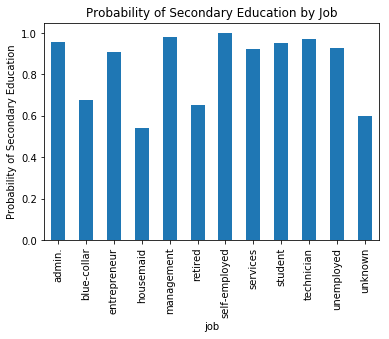

               education
job                     
admin.          0.146444
blue-collar     0.034722
entrepreneur    0.500000
housemaid       0.200000
management      0.892694
retired         0.144737
self-employed   0.758065
services        0.069620
student         0.202532
technician      0.310976
unemployed      0.294118
unknown         0.200000


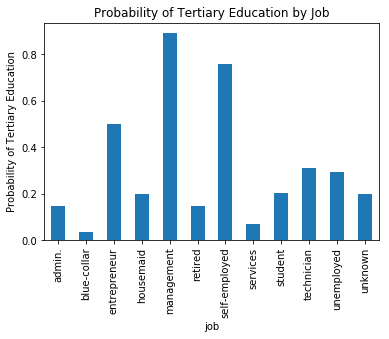

In [31]:
# Calculate statistics for the categorical attributes.

# frequency_table = df['job'].value_counts(ascending=True)
# print('Frequency Table for job:') 
# print(frequency_table)

# # Plot the frequency table for housing
# frequency_table.plot(kind='bar')
# plt.xlabel('job')
# plt.ylabel('Number of Applicants')
# plt.title('Applicants by job')

pivot_table = df.pivot_table(values='education',
                       index=['job'],
                       aggfunc=lambda x: x.map({'primary':0, 'secondary':1, 'tertiary':1}).mean()) 

# Print pivot table
print(pivot_table)

# Plot pivot table
pivot_table.plot(kind='bar')
plt.xlabel('job')
plt.ylabel('Probability of Secondary Education')
plt.title('Probability of Secondary Education by Job')
plt.legend().set_visible(False) # we don't need the default legend

plt.show()

pivot_table = df.pivot_table(values='education',
                       index=['job'],
                       aggfunc=lambda x: x.map({'primary':0, 'secondary':0, 'tertiary':1}).mean()) 

# Print pivot table
print(pivot_table)

# Plot pivot table
pivot_table.plot(kind='bar')
plt.xlabel('job')
plt.ylabel('Probability of Tertiary Education')
plt.title('Probability of Tertiary Education by Job')
plt.legend().set_visible(False) # we don't need the default legend

plt.show()

In [32]:
idx = df.loc[df['education'].isnull()].index
print(idx)

Int64Index([  10,   15,  124,  209,  257,  262,  285,  324,  348,  381,
            ...
            1869, 1899, 1925, 1935, 1938, 1944, 1972, 1985, 1993, 1995],
           dtype='int64', length=104)


In [33]:
idx = df.loc[df['job']=='management'].index
print(idx)

Int64Index([   8,    9,   10,   19,   21,   23,   24,   25,   35,   40,
            ...
            1960, 1963, 1965, 1966, 1969, 1976, 1979, 1982, 1984, 1993],
           dtype='int64', length=461)


In [34]:
print(df.loc[(df['job'].isin(['management','entrepeneur','self-employed'])) & (df['education'].isin(['primary']))])

       age         job  marital education default  balance  ratio_bal_ln  \
23    40.0  management  married   primary      no      738      0.936778   
160   53.0  management  married   primary      no      798     -0.170324   
171   55.0  management  married   primary      no      621      0.753516   
343   56.0  management  married   primary      no      199      0.850639   
391   42.0  management  married   primary      no     -417      0.133487   
620   44.0  management  married   primary      no     5418      0.050233   
936   47.0  management  married   primary      no     1222      0.187067   
1619  59.0  management  married   primary      no     1727     -0.359920   
1682  56.0  management  married   primary      no      870     -0.826019   

      ratio_ln_inc housing loan        ...        duration  campaign pdays  \
23        0.742725     yes  yes        ...             399         2   258   
160      -0.755515     yes   no        ...              45         1   217   
171  

In [35]:
# Get indices of rows with missing 'education' values and job = ['management','entrepeneur','self-employed']
# https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas/17071908
idx = df.loc[(df['job'].isin(['management','entrepeneur','self-employed'])) & (df['education'].isnull())].index

for i in idx:
    # Replace the NaN value with the Predicted Value
    df.loc[i, 'education'] = 'tertiary'

# Fill the rest of the missing values with 'secondary'
df['education'].fillna('secondary', inplace=True)


#### Education Missing Values Analysis
education
Total Values = 	 1896 

secondary    995
tertiary     684
primary      217

11% Primary Education
52% Secondary Education
36% Tertiary Education

Assuming that everyone with a Tertiary Education also has a Seconday Education, this means that 88% of people actually have a secondary education

Using job as an indicator of education level

For all job types, the probability of secondary education (incl tertiary) is greater than 0.5, indicating that it is most likely that all of the missing samples have at least got a secondary education.

There are only three job types that have a probability of tertiary education greater than 0.5
* entrepeneur = 0.5
* management = 0.89
* self-employed = 0.75

All the other job types have a low probability of having tertiary education.

Therefore, the strategy to replace NaNs in Education column will be as follows:
* Replace all Education NaNs that have a job = 'entrepeneur' OR 'management' OR 'self-employed' with 'tertiary'
* Replace all others with 'secondary'

#### Contact Missing Values

Total Values = 	 1809 

cellular     1663
telephone     146

92% of values are 'cellular'. 

Replace all missing values with 'cellular'

In [36]:
# Fill missing 'contact' values with 'cellular'
df['contact'].fillna('cellular', inplace=True)

#### Poutcome Missing Values

Total Values = 	 1546 

failure    955
success    444
other      147

62% Failure
29% Success
9.5% Other

There are almost 25% of the dataset with a missing value for this attribute. Given that this attribute already has an "other" label that has no specific outcome attached to it, I am going to replace all missing values with "other"

In [37]:
# Fill missing 'poutcome' values with 'other'
df['poutcome'].fillna('other', inplace=True)

In [38]:
# Check that all attributes no longer have any missing values
df.apply(lambda x: sum(x.isnull()), axis=0)

age                     0
job                     0
marital                 0
education               0
default                 0
balance                 0
ratio_bal_ln            0
ratio_ln_inc            0
housing                 0
loan                    0
contact                 0
day                     0
month                   0
duration                0
campaign                0
pdays                   0
previous                0
poutcome                0
subscribed              0
work_status_retired     0
work_status_student     0
has_been_married_yes    0
post_primary_yes        0
dtype: int64

### Replace Categoricals With Numerical Attributes

In [39]:
df = pd.get_dummies(df, columns=['job','marital', 'education', 'housing', 'default', 'loan', 'contact', 'month', 'poutcome'], drop_first=True)

In [40]:
df.describe()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous,work_status_retired,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,41.747000,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500,0.081000,...,0.122500,0.083500,0.052000,0.035000,0.166500,0.034000,0.046500,0.067000,0.30050,0.222000
std,12.707586,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735,0.272903,...,0.327944,0.276706,0.222083,0.183826,0.372622,0.181274,0.210618,0.250085,0.45859,0.415695
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [41]:
df.head()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous,subscribed,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,32.0,392,1.300134,0.473895,1,957,2,131,2,no,...,0,0,0,0,0,0,0,0,0,0
1,39.0,688,-0.193701,0.237021,1,233,2,133,1,no,...,0,0,0,0,0,0,0,0,0,0
2,59.0,1035,1.334266,0.121981,1,126,2,239,1,no,...,0,0,0,0,0,0,0,0,0,0
3,47.0,398,0.362286,1.251328,1,274,1,238,2,no,...,0,0,0,0,0,0,0,0,0,0
4,54.0,1004,0.072075,-0.533738,1,479,1,307,1,no,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df.tail()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous,subscribed,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
1995,20.0,2785,-2.170524,1.081071,16,327,2,-1,0,yes,...,0,0,0,0,0,0,0,1,1,0
1996,28.0,127,0.811788,1.134496,16,1334,2,-1,0,yes,...,0,0,0,0,0,0,0,1,1,0
1997,81.0,1154,0.504655,0.042190,17,231,1,-1,0,yes,...,0,0,0,0,0,0,0,1,1,0
1998,46.0,4343,-0.965874,0.302708,20,185,1,-1,0,yes,...,0,0,0,0,0,0,0,1,1,0
1999,40.0,6403,-0.800893,1.066659,22,208,2,-1,0,yes,...,0,0,0,0,0,0,0,1,1,0


## Task 1 Explanation

Task 1 Missing Values

age              12
job              10
education       104
contact         191
poutcome        454

Age has 12 missing features. I thought that 'job' might be a good indicator of age and plotted a boxplot of age versus job. It showed that 'student' had lower ages than most other 'job' values and that 'retired' had higher values than all other jobs - this outcome stands to reason. For all the other jobs, the spread of ages on the boxplot looked broadly similar (except possibly for entrepeneur and handmain) and suggested most other jobs had a reasonable age distribution.

I also plotted 'education' versus 'age' and it showed that 'primary' had a slightly higher average age than 'secondary' and 'tertiary'. 

Similarly, 'marital' status versus 'age' showed that 'single' had a lower range than 'married' and 'divorced' again this stands to reason.

I decided to use a decision tree using job, education and marital to infer age. 

As jobs had ages clustered in three ranges, I created a new feature "work_status" that bucketed applicants into "available" for work, "retired" or "student".

Since married also had clustered ages, I created a new feature 'has_been_married' which grouped 'married' and 'divorced' together and kept 'single' as its own label

As secondary and tertiary education had similar age spreads, I created a feature called "post_primary" to group these together.

I used these engineered feature to create a decision tree to infer the value of ages

For 'jobs' and 'education' I used pivot table analysis to infer the missing values

For 'contact' and 'poutcome' I merely used 'unknown' to replace the missing values as this suited the data

## Task 2 Explanation
TODO

Skipping outlier removal and will work on in second week of etivity

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


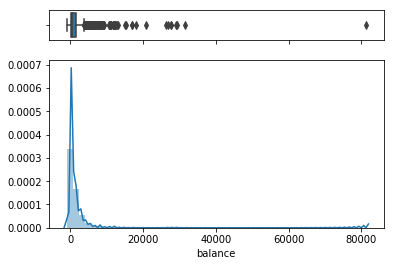

In [43]:
def plot_hist_with_box(feature):
    # From https://python-graph-gallery.com/24-histogram-with-a-boxplot-on-top-seaborn/
    # Cut the window in 2 parts
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    # Add a graph in each part
    sns.boxplot(df[feature], ax=ax_box)
    sns.distplot(df[feature], ax=ax_hist)
    #sns.boxplot(df["balance"], ax=ax_box)
    #sns.distplot(df["balance"], ax=ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    plt.show()
    return

plot_hist_with_box('balance')


['age', 'balance', 'ratio_bal_ln', 'ratio_ln_inc', 'day', 'duration', 'campaign', 'pdays', 'previous']
Feature:	 age


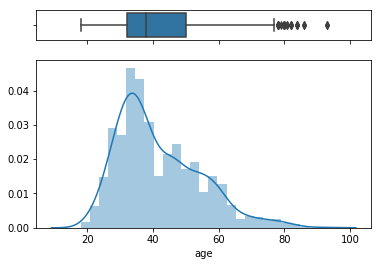


 ----------------------------------------------------------------------
Feature:	 balance


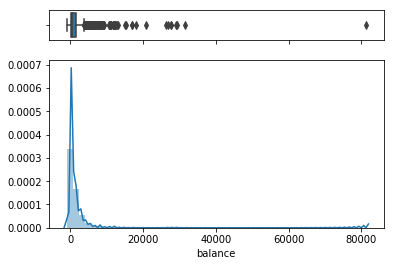


 ----------------------------------------------------------------------
Feature:	 ratio_bal_ln


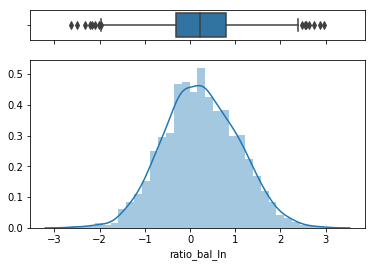


 ----------------------------------------------------------------------
Feature:	 ratio_ln_inc


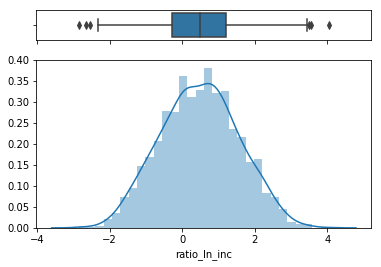


 ----------------------------------------------------------------------
Feature:	 day


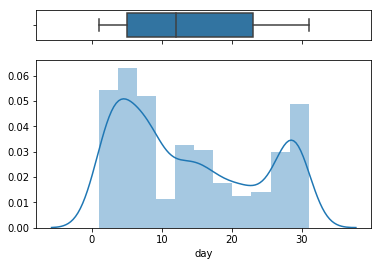


 ----------------------------------------------------------------------
Feature:	 duration


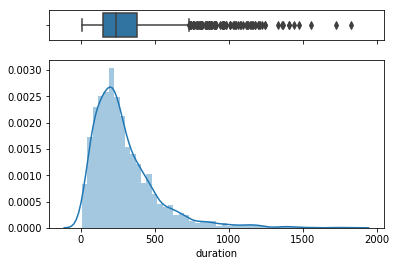


 ----------------------------------------------------------------------
Feature:	 campaign


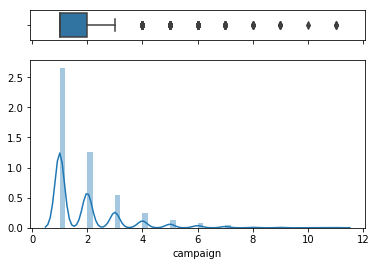


 ----------------------------------------------------------------------
Feature:	 pdays


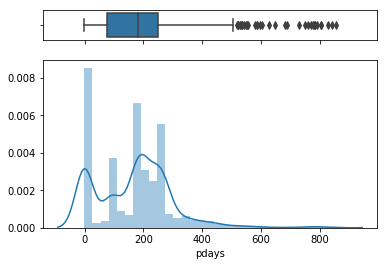


 ----------------------------------------------------------------------
Feature:	 previous


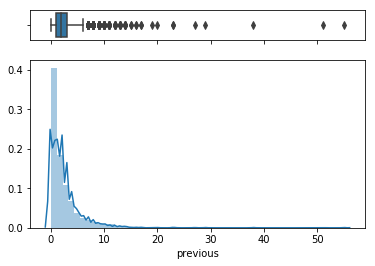


 ----------------------------------------------------------------------


In [46]:
print(numeric_cols)

for col in numeric_cols:
    print('Feature:\t',col)
    plot_hist_with_box(str(col))
    print('\n', '-' * 70) # separator to make the output easy to read


#### Outlier Analysis
	• age 
		○ Applicant Age
		○ 18-93
		○ Several outliers in the late70s to early 90s
	• balance
		○ Average Yearly Balance
		○ One very far out outlier
		○ Many other outliers
		○ Not normally distributed
		○ Has negative values so log transform cannot be applied directly
	• ratio_bal_ln
		○ Ratio of Balance to Loan
		○ Normally distributed
		○ Some outliers in tail regions
		○ Centred around zero
	• ratio_ln_inc
		○ Ratio of Loan to Income
		○ Normally distributed
		○ Some outliers in tail regions
		○ Centred around zero
	• day
		○ Last contact day of month
		○ Distribution aligns with a number that is used to indicate a calendar dat
		○ Bump at beginning and end of month
	• duration
		○ Last contact duration in seconds
		○ Normal distribution with outliers in tail region
	• campaign
		○ Number of Contacts Performed during the current campaign
		○ Majority of people contacted 1-3 times
	• pdays
		○ Number of days that passed by after the client was last contacted from a previous campaign
		○ -1 = Not contacted
		○ There are 454 examples with pdays set to -1 to indicate no contact, this is distrorting the distribution
		○ If this value was ignored, the distribution would start to approach a normal distribution
		○ There are no examples with a value of pdays = 0
		
	• previous
		○ Number of Contacts Performed during the previous campaign
		○ Varies from 0 to 55 but with an average of 2.5
		○ The 75% value is 3 which suggests a lot of outliers
        ○ TheExponential distribution appearance

#### Next Steps
* Age
* Balance
* Outliers not being considered for removal/transformation as they will not be used in subsequent logistic regression:
  - duration
  - pdays
  - previous

In [87]:

#print(df['pdays'].value_counts())
print((df['previous'] == 0).sum())
#power_transform(data, method='box-cox')
#df[''] = power_transform(df['previous'], method='box-cox')
#df['log_previous'], lam = boxcox(df['previous']+1)
print(np.expand_dims(df['previous']+1, axis=1).shape)
df['log_previous'] = np.log(df['previous']+1)

454
(2000, 1)


C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


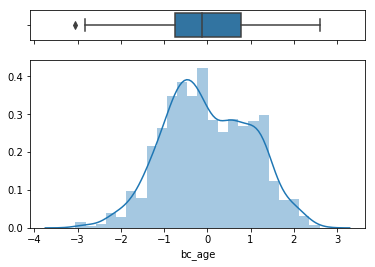

In [136]:
# Apply Box-Cox Transform to 'age'

df['bc_age'] = power_transform(np.expand_dims(df['age'], axis=1), method='box-cox')
plot_hist_with_box('bc_age')

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


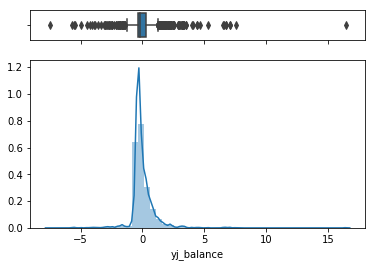

In [138]:
# Balance contains negative values which means log transform or box-cox cannot be applied
# Yeo-Johnson handles positive and negative numbers so applying that transform

df['yj_balance'] = power_transform(np.expand_dims(df['balance'], axis=1), method='yeo-johnson')
plot_hist_with_box('yj_balance')

## Task 3 (CS5062)
Suggest the creation of at least one new feature from the existing ones and justify the usefulness of your choice within the context of the 2-class classification problem you have defined in E-tivity 1.

### Task 3 Feature Creation

The following text is taken from Task 1 since I created 3 new features to use when inferring the missing age values using a decision tree

I would like to analyse the data more in Week 4 to determine what other features can be created

As jobs had ages clustered in three ranges, I created a new feature "work_status" that bucketed applicants into "available" for work, "retired" or "student".

Since married also had clustered ages, I created a new feature 'has_been_married' which grouped 'married' and 'divorced' together and kept 'single' as its own label

As secondary and tertiary education had similar age spreads, I created a feature called "post_primary" to group these together.

I used these engineered feature to create a decision tree to infer the value of ages

For 'jobs' and 'education' I used pivot table analysis to infer the missing values

For 'contact' and 'poutcome' I merely used 'unknown' to replace the missing values as this suited the data

## Task 4 (CE6002)
Using the dataset you prepared, perform a classification on the data using scikitlearn’s logistic regression.

Generate plots of the approximate probability P[Ein-Eout|>e]. You can use the exact same approach as in E-tivity 1. In the same figure, plot the Hoeffding bound and the VC bound and check whether or not either bound is exceeded (indicate this clearly in a markdown cell).

In [139]:
# Get list of numeric columns in datset
# https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas
colnames_numerics_only = df.select_dtypes(include=[np.number]).columns.tolist()
print(colnames_numerics_only)
print(len(colnames_numerics_only))


['age', 'balance', 'ratio_bal_ln', 'ratio_ln_inc', 'day', 'duration', 'campaign', 'pdays', 'previous', 'work_status_retired', 'work_status_student', 'has_been_married_yes', 'post_primary_yes', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'housing_yes', 'default_yes', 'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success', 'log_previous', 'bc_age', 'yj_balance']
48


In [211]:
#Shuffle the dataframe
df = df.sample(frac=1, random_state=42)

# Create the dataset from the dataframe
X = df[colnames_numerics_only].values
#X = df[['ratio_bal_ln', 'ratio_ln_inc']].values
y_labels = df[['subscribed']].values

# Using output values of 0 and 1 for Logistic Regression
y = [1 if yy == 'yes' else 0 for yy in y_labels] 

In [212]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [213]:
# Example Code taken from https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

# Run Logistic Regression on the dataset to compare with performance achieved using Pocket algorithm
#logreg = LogisticRegression()
logreg = LogisticRegression(solver='lbfgs')

# Fit to dataset
logreg.fit(X_train, y_train)

# Predict
y_hat = logreg.predict(X_test)

score_test = logreg.score(X_test, y_test)
score_train  = logreg.score(X_train, y_train)

# Substract scores from 1 to convert to Ein/Eout
etrain = 1 - score_train
etest = 1 - score_test

print("Logistic Regression Performance")
print("Etrain  =\t",etrain)
print("Etest = \t",etest)

Logistic Regression Performance
Etrain  =	 0.073125
Etest = 	 0.10999999999999999


C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [214]:
print(y_hat)
print(y_test)

[0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0
 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0
 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1
 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1
 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1
 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0
 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1
 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0

In [215]:
y_train_hat = logreg.predict(X_train)

errors = 0
for i in range(len(y_train)):
    if(y_train_hat[i]!=y_train[i]):
        errors+=1

print(errors)
print(len(y_train))
print("Error Percentage",errors/len(y_train))

117
1600
Error Percentage 0.073125


In [216]:
y_test_hat = logreg.predict(X_test)

errors = 0
for i in range(len(y_test)):
    if(y_test_hat[i]!=y_test[i]):
        errors+=1

print(errors)
print(len(y_test))
print("Error Percentage",errors/len(y_test))

44
400
Error Percentage 0.11


In [217]:
# Plot Probabilities and Hoeffing Bound as per example in exercise 1.10
# Pass in dataset and weights and repeat value and function will then 
# plot probabilities and bounds for a variety of values of N
def hoeffding_plot(X, y, hypothesis, repeats=100):

    N = [1,10,50,100,200,300,500,1000]

    for n in N:
        d_ein = np.empty((repeats))
        d_eout = np.empty((repeats))
        d_abs = []

        test_size = n/len(X)
        for i in range(repeats):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
            
            score_test   = hypothesis.score(X_test, y_test)
            score_train  = hypothesis.score(X_train, y_train)

            # Substract scores from 1 to convert to Ein/Eout
            etrain = 1 - score_train
            etest = 1 - score_test
            
            ein  = etrain #calc_error(X_test, y_test, weights)
            eout = etest  #calc_error(X_train, y_train, weights)
            diff = abs(ein-eout)
            d_ein[i] = ein
            d_eout[i] = eout
            d_abs.append(diff)


        ein_avg  = f"Ein(avg)  = {d_ein.mean():.3f}"
        eout_avg = f"Eout(avg) = {d_eout.mean():.3f}"

        prob_epsilon=[]
        epsilons = np.arange(0, 1, 0.01)
        for e in epsilons:
            prob_epsilon.append(len([1 for i in d_abs if i > e])/len(d_abs))

        bound_label='Hoeffding Bound for N='+str(n)
        prob_label = 'P[abs(Ein-Eout)>e] for N='+str(n)
        title = 'N='+str(n)+" Repeats="+str(repeats)
        plt.figure()
        plt.plot(epsilons, prob_epsilon,label=prob_label)
        plt.plot(epsilons, [2*math.exp(-2*e**2*n) for e in epsilons],label=bound_label)
        plt.legend()
        plt.text(0.8, 1.5, ein_avg+"\n"+eout_avg)
        plt.xlabel('Epsilon')
        plt.title(title)
        plt.show


In [ ]:
## Pass the weights for the chosen hypothesis and the dataset to a function
# that will generate random datasets and plot the performance versus the Hoeffding bound
#hoeffding_plot(X,y,logreg,repeats=1000)

#### Probability Plots
* Using same approach as given in Etivity1 solutions

Approximating the probability that |E_in - E_out|>epsilon by running the experiment multiple times and recording error scores. Done here for 100 iterations to limit processing time. For higher number of iterations, likelihood of non-zero values for higher epsilons increases.

In [219]:
# MPP repeats=100
# MPP Increase repeats to 500
repeats=100
#use 20% of data for training
tr_size = 0.8
error_in=[]
error_out=[]
for i in range(repeats):
    # MPP print(i) <-- Do not print i
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=tr_size, test_size=(1-tr_size))
    
    # Example Code taken from https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

    # Run Logistic Regression on the dataset to compare with performance achieved using Pocket algorithm
    # Add "solver='lbfgs'" to remove "FutureWarning: Default solver will be changed
    # to 'lbfgs' in 0.22. Specify a solver to silence this warning."
    logreg = LogisticRegression(solver='lbfgs')

    # Fit to dataset
    logreg.fit(X_train, y_train)

    score_test = logreg.score(X_test, y_test)
    score_train  = logreg.score(X_train, y_train)

    # Substract scores from 1 to convert to Ein/Eout
    etrain = 1 - score_train
    etest = 1 - score_test
       
    error_in.append(etrain)
    error_out.append(etest)



C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

In [220]:
print(error_in)
print(error_out)

[0.104375, 0.09875, 0.09624999999999995, 0.10124999999999995, 0.09999999999999998, 0.10562499999999997, 0.11062499999999997, 0.09875, 0.109375, 0.07750000000000001, 0.09937499999999999, 0.10562499999999997, 0.10062499999999996, 0.12250000000000005, 0.10312500000000002, 0.104375, 0.10187500000000005, 0.09750000000000003, 0.10187500000000005, 0.14187499999999997, 0.10375000000000001, 0.08937499999999998, 0.10499999999999998, 0.10250000000000004, 0.10187500000000005, 0.10375000000000001, 0.08562499999999995, 0.11187499999999995, 0.09999999999999998, 0.09875, 0.10750000000000004, 0.09999999999999998, 0.10187500000000005, 0.10062499999999996, 0.10499999999999998, 0.104375, 0.10375000000000001, 0.10250000000000004, 0.104375, 0.09687500000000004, 0.10062499999999996, 0.10999999999999999, 0.08437499999999998, 0.104375, 0.09999999999999998, 0.10062499999999996, 0.12749999999999995, 0.10312500000000002, 0.10187500000000005, 0.10124999999999995, 0.10062499999999996, 0.09999999999999998, 0.09875, 

48
Error exceeds Hoeffding
Error does not exceed VC


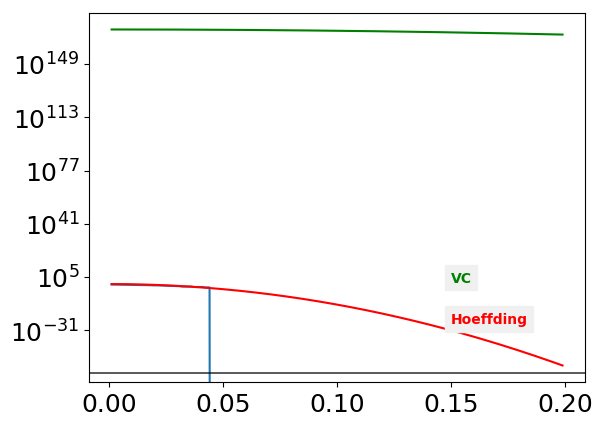

In [221]:
style.use('default')
#style.use('fivethirtyeight')

print(X_train.shape[1])

N=len(X_train)
# VC dimension (dvc) = d+1 where d is the dimensionality of the input data
dvc = X_train.shape[1] + 1

error_diff = abs(np.array(error_in)-np.array(error_out))
epsilons = np.arange(0.001,0.20,0.001)
prob_epsilon=[]
for e in epsilons:
        prob_epsilon.append(len([1 for i in error_diff if i > e])/len(error_diff))
plt.plot(epsilons, prob_epsilon)

hoef = [2*math.exp(-2*N*e**2) for e in epsilons]
vc = [4*(((2*N)**dvc)+1)*math.exp(-(N/8)*e**2) for e in epsilons]

print("Error exceeds Hoeffding" if max(np.array(prob_epsilon)-np.array(hoef))>0 else "Error does not exceed Hoeffding")
print("Error exceeds VC" if max(np.array(prob_epsilon)-np.array(vc))>0 else "Error does not exceed VC")

plt.plot(epsilons, hoef,'r')
plt.plot(epsilons, vc, 'g')
plt.yscale('log')
plt.axhline(y = 10**-60, color = 'black', linewidth = 1.3, alpha = .7)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.text(x = 0.15, y = 10**-26, s = 'Hoeffding', color = 'r', weight = 'bold', rotation = 0, backgroundcolor = '#f0f0f0')
plt.text(x = 0.15, y = 10*7, s = 'VC', color = 'g', weight = 'bold', rotation = 0, backgroundcolor = '#f0f0f0')
plt.show()

In [166]:
import matplotlib.style as style
style.available
#style.use('fivethirtyeight')

## Task 5 (CE6002)
Using the dataset, make learning curves for logistic regression and two other machine learning algorithms of your choosing using scikitlearn’s learning_curve functionality. Choose one algorithm with low complexity in terms of VC dimension and one algorithm with high complexity.

Comment on what information you can derive from the learning curves  (in a markdown cell) and how this information differs between simple and complex machine learning algorithms.

In [222]:
def plot_learning_curve(X,y,estimator=LogisticRegression()):
# https://www.dataquest.io/blog/learning-curves-machine-learning/
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

    # Max Value = 80% of 2000 = 1600
    # train_sizes = [1, 100, 500, 1000, 1600] ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0
    #train_sizes = [10, 100, 500, 1000, 1600]
    train_sizes = [50, 100, 500, 1000, 1600]

    # train_sizes, train_scores, validation_scores = learning_curve(
    #                                                    estimator = LinearRegression(), X = electricity[features],
    #                                                    y = electricity[target], train_sizes = train_sizes, cv = 5,
    #                                                    scoring = 'neg_mean_squared_error')

    train_sizes, train_scores, validation_scores = learning_curve(
                                                       #estimator = LogisticRegression(), X = X,
                                                       #estimator = LinearRegression(), X = X,
                                                       #estimator = SVC(gamma=0.001), X = X,
                                                       #estimator = LinearSVC(), X = X,
                                                       #estimator = GaussianNB(), X = X,
                                                       estimator = estimator, X = X,
                                                       #y = y, train_sizes = train_sizes, cv = 5,
                                                       #scoring = 'neg_mean_squared_error')
                                                        y = y, train_sizes = train_sizes, cv = 5)

    # from https://www.w3resource.com/python-exercises/re/python-re-exercise-50.php
    # Remove any text between the parentheses in the title string
    estimator_string = re.sub(r" ?\([^)]+\)", "", str(estimator))
    
    
    print('\n', '-' * 70) # separator to make the output easy to read
    print('Estimator = ',estimator_string)
    print('\n', '-' * 70) # separator to make the output easy to read
    print('Training scores:\n\n', train_scores)
    print('\n', '-' * 70) # separator to make the output easy to read
    print('\nValidation scores:\n\n', validation_scores)
    print('\n', '-' * 70) # separator to make the output easy to read

    #train_scores_mean = -train_scores.mean(axis = 1)
    #validation_scores_mean = -validation_scores.mean(axis = 1)
    # MPP Remove the "-" from reference code in article
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)
    train_scores_std = train_scores.std(axis = 1)
    validation_scores_std = validation_scores.std(axis = 1)

    print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
    print('\n', '-' * 70) # separator to make the output easy to read
    print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
    print('\n', '-' * 70) # separator to make the output easy to read
          
    title = 'Learning curves for a '+estimator_string+' model'
    

    #plt.style.use('seaborn')

    #plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    #plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
    
    
    plt.grid()
    plt.ylim(top=1.01)
    plt.ylim(bottom=0.5)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

    plt.ylabel('Score', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.show();

In [223]:
print(y)

[0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\skl


 ----------------------------------------------------------------------
Estimator =  LogisticRegression

 ----------------------------------------------------------------------
Training scores:

 [[0.98     0.98     0.98     0.98     0.98    ]
 [0.99     0.99     0.99     0.99     0.99    ]
 [0.978    0.974    0.98     0.98     0.98    ]
 [0.982    0.978    0.975    0.976    0.976   ]
 [0.973125 0.9725   0.970625 0.97125  0.9725  ]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.875  0.8625 0.8375 0.8525 0.8325]
 [0.9125 0.9175 0.91   0.9075 0.88  ]
 [0.95   0.96   0.95   0.9675 0.94  ]
 [0.9525 0.975  0.9625 0.97   0.95  ]
 [0.955  0.97   0.97   0.9775 0.9525]]

 ----------------------------------------------------------------------
Mean training scores

 50      0.9800
100     0.9900
500     0.9784
1000    0.9774
1600    0.9720
dtype: float64

 ----------------------------------------------------------------------

Mean validation 

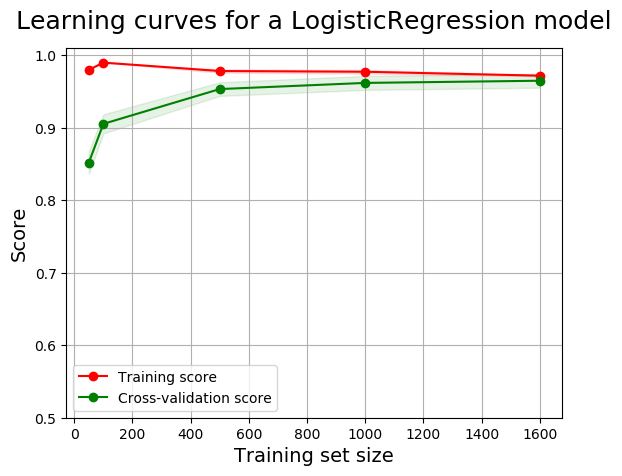


 ----------------------------------------------------------------------
Estimator =  LinearRegression

 ----------------------------------------------------------------------
Training scores:

 [[0.93763485 0.96531131 0.96531131 0.96531131 0.96531131]
 [0.89143281 0.91924521 0.91924521 0.91924521 0.91924521]
 [0.83883594 0.80754652 0.82116705 0.82116705 0.82116705]
 [0.82605195 0.81168014 0.81923429 0.82141965 0.82141965]
 [0.80788576 0.80053766 0.80372761 0.80531001 0.8158386 ]]

 ----------------------------------------------------------------------

Validation scores:

 [[-0.44624452 -1.67071543 -2.63736651 -1.10046158 -3.02432723]
 [ 0.73624627  0.69492728  0.67196806  0.67551516  0.61085036]
 [ 0.7730184   0.81248681  0.78418747  0.77160182  0.73383821]
 [ 0.78721203  0.81959909  0.80109648  0.78888081  0.7370909 ]
 [ 0.79185225  0.81638093  0.80606358  0.80062017  0.75481988]]

 ----------------------------------------------------------------------
Mean training scores

 50     

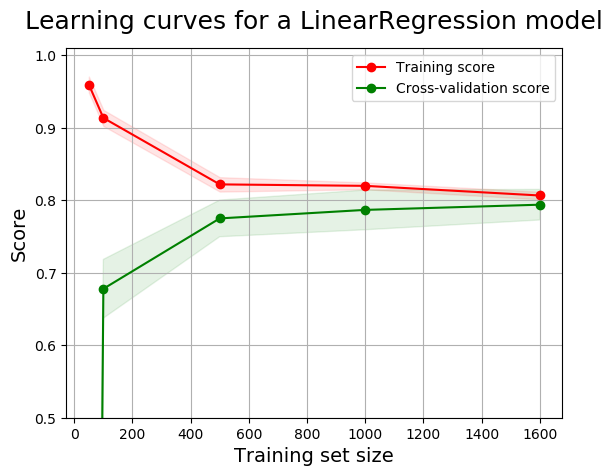


 ----------------------------------------------------------------------
Estimator =  GaussianNB

 ----------------------------------------------------------------------
Training scores:

 [[0.96     0.98     0.98     0.98     0.98    ]
 [0.97     0.96     0.96     0.96     0.96    ]
 [0.93     0.934    0.936    0.936    0.936   ]
 [0.928    0.929    0.923    0.933    0.933   ]
 [0.92625  0.925625 0.925    0.93     0.926875]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.925  0.875  0.8925 0.875  0.865 ]
 [0.9375 0.8775 0.905  0.895  0.88  ]
 [0.9275 0.9275 0.9475 0.9175 0.925 ]
 [0.9325 0.92   0.9475 0.9175 0.925 ]
 [0.9275 0.9225 0.9425 0.9225 0.9175]]

 ----------------------------------------------------------------------
Mean training scores

 50      0.97600
100     0.96200
500     0.93440
1000    0.92920
1600    0.92675
dtype: float64

 ----------------------------------------------------------------------

Mean validation sco

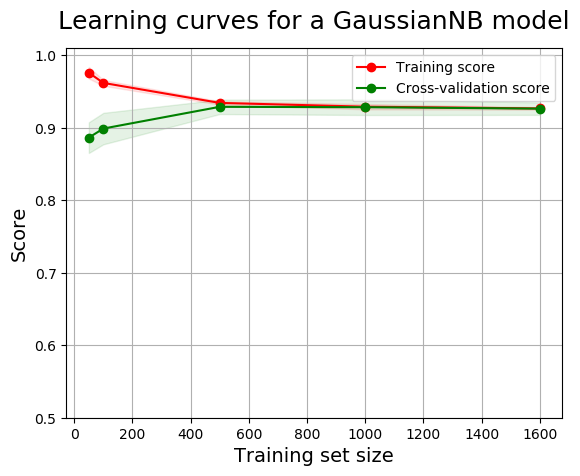

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm


 ----------------------------------------------------------------------
Estimator =  LinearSVC

 ----------------------------------------------------------------------
Training scores:

 [[0.44     0.6      0.58     0.72     0.8     ]
 [0.63     0.72     0.61     0.7      0.71    ]
 [0.516    0.648    0.864    0.838    0.634   ]
 [0.893    0.892    0.693    0.882    0.593   ]
 [0.756875 0.8475   0.60375  0.846875 0.83625 ]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.565  0.53   0.5    0.645  0.7025]
 [0.635  0.72   0.54   0.6325 0.6575]
 [0.54   0.66   0.85   0.815  0.56  ]
 [0.8725 0.905  0.67   0.885  0.6075]
 [0.7475 0.86   0.585  0.85   0.8325]]

 ----------------------------------------------------------------------
Mean training scores

 50      0.62800
100     0.67400
500     0.70000
1000    0.79060
1600    0.77825
dtype: float64

 ----------------------------------------------------------------------

Mean validation scor

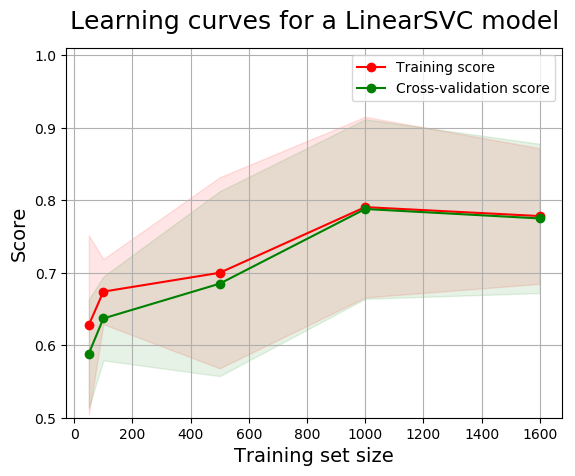


 ----------------------------------------------------------------------
Estimator =  GaussianProcessClassifier, max_iter_predict=100,
             multi_class='one_vs_rest', n_jobs=None,
             n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
             random_state=None, warm_start=False)

 ----------------------------------------------------------------------
Training scores:

 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.5    0.5125 0.5025 0.4975 0.505 ]
 [0.5    0.5175 0.5025 0.51   0.5125]
 [0.5325 0.5275 0.5225 0.5275 0.5175]
 [0.535  0.555  0.52   0.5525 0.535 ]
 [0.56   0.57   0.54   0.56   0.5475]]

 ----------------------------------------------------------------------
Mean training scores

 50      1.0
100     1.0
500     1.0
1000    1.0
1600    1.0
dtype: float64

 --------------------------------------------------------

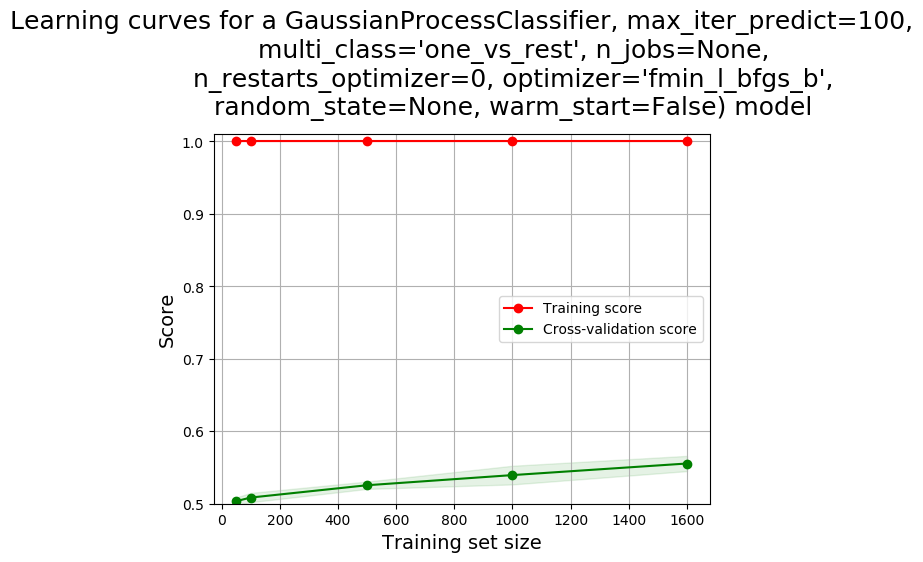

In [225]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

estimators = [LogisticRegression(), LinearRegression(), GaussianNB(), LinearSVC(),GaussianProcessClassifier(1.0 * RBF(1.0))]

for est in estimators:
    plot_learning_curve(X,y,estimator=est)